In [94]:
class neuralNetwork:
    
    def __init__(self, inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        
    
    


        import numpy

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))

        import scipy.special
        self.activation_function=lambda x:scipy.special.expit(x)
        pass

    def train(self,inputs_list,targets_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        output_errors=targets-final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        


In [95]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.3

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [96]:
training_data_file = open("mnist_train_100.csv",'r') 
training_data_list = training_data_file.readlines()
training_data_file.close()

In [97]:
import numpy
import matplotlib.pyplot
%matplotlib inline
import scipy.special

In [98]:
for record in training_data_list: # split the record by the ',' commas 
    all_values = record.split(',') # scale and shift the inputs 
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # create the target output values (all 0.01, except the desiredlabel which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99 
    n.train(inputs, targets)
    pass

In [99]:
test_data_file=open("mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [100]:
all_values=test_data_list[0].split(',')
print(all_values[0])

7


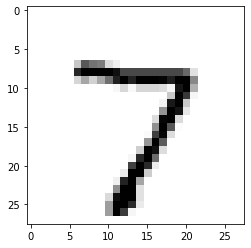

In [101]:
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='none')

In [103]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.10056758],
       [0.01977572],
       [0.00907153],
       [0.11401471],
       [0.07562421],
       [0.04158296],
       [0.00274566],
       [0.91754589],
       [0.04310761],
       [0.03155235]])

In [106]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print(correct_label,"correct_label")
    inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    print(label,"network's answer")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
        
    
    

7 correct_label
7 network's answer
2 correct_label
3 network's answer
1 correct_label
1 network's answer
0 correct_label
0 network's answer
4 correct_label
4 network's answer
1 correct_label
1 network's answer
4 correct_label
7 network's answer
9 correct_label
3 network's answer
5 correct_label
4 network's answer
9 correct_label
7 network's answer


In [108]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]


In [119]:
import imageio
import glob

In [120]:
our_own=[]

In [127]:
for image_file in glob.glob('33.png'):
    print("loading",image_file)
    label=int(image_file[-5:-4])
    image_array=imageio.imread(image_file,as_gray=True)
    img_data=255.0-image_array.reshape(784)
    img_data=(img_data/255.0*0.99)+0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    record=numpy.append(label,img_data)
    print(record)
    our_own.append(record)
    pass

loading 33.png
0.01
0.82645494
[3.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.01388235 0.01388235 0.01
 0.02164706 0.03329412 0.03717647 0.03717647 0.03329412 0.02552941
 0.01776471 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.02164706 0.02669022 0.03717647
 0.09152941 0.12258823 0.07988235 0.03717647 0.20023531 0.35941178
 0.44482353 0.46811765 0.40988237 0.2507059  0.15480788 0.05658824
 0.01388235 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.06047059 0.1924706  0.32563138 0.46972102 0.65995634 0.60011768
 0.29341176 0.03329412 0.16917649 0.23517647 0.33611766 0.4238084
 0.48913279 0.59395635 0.67664665 0.41536808 0.13811766 0.01388235
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.11482353 0.38658825
 0.6272

In [128]:
print(our_own[0])

[3.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.01388235 0.01388235 0.01
 0.02164706 0.03329412 0.03717647 0.03717647 0.03329412 0.02552941
 0.01776471 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.02164706 0.02669022 0.03717647
 0.09152941 0.12258823 0.07988235 0.03717647 0.20023531 0.35941178
 0.44482353 0.46811765 0.40988237 0.2507059  0.15480788 0.05658824
 0.01388235 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.06047059 0.1924706  0.32563138 0.46972102 0.65995634 0.60011768
 0.29341176 0.03329412 0.16917649 0.23517647 0.33611766 0.4238084
 0.48913279 0.59395635 0.67664665 0.41536808 0.13811766 0.01388235
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.11482353 0.38658825
 0.62729412 0.55857259 0.40760338 0.24

[[0.07508922]
 [0.15646946]
 [0.00515236]
 [0.37335665]
 [0.06943486]
 [0.13597314]
 [0.10191955]
 [0.53056441]
 [0.12050254]
 [0.01211968]]
network says  7
no match!


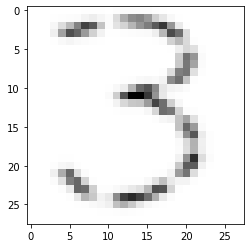

In [137]:
# test the neural network with our own images

# record to test
item=0

# plot image
matplotlib.pyplot.imshow(our_own[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own[item][0]
# data is remaining values
inputs = our_own[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass